 Chọn các kỹ thuật xử lý (nhập số, cách nhau bằng dấu phẩy):
Z: Zoom
T: Rotate
H: Horizontal Flip
V: Vertical Flip
C: Crop
P: Padding
 Ảnh sau xử lý đã lưu tại: output/processed_dalat.jpg
 Ảnh sau xử lý đã lưu tại: output/processed_world_cup.jpg
 Ảnh sau xử lý đã lưu tại: output/processed_fruit.jpg


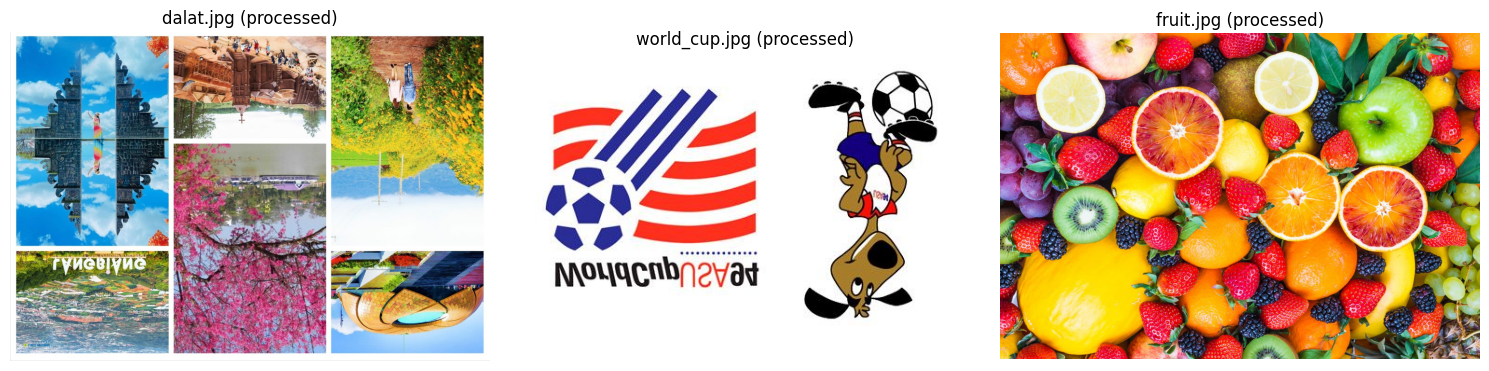

In [4]:
import cv2
import numpy as np
import random
import os
import matplotlib.pyplot as plt

input_image_names = ["dalat.jpg","world_cup.jpg","fruit.jpg"]

def zoom_image(image, scale=2.0):
    height, width = image.shape[:2]
    return cv2.resize(image, (int(width * scale), int(height * scale)))

def rotate_image(image):
    angle = random.randint(0, 360)
    height, width = image.shape[:2]
    M = cv2.getRotationMatrix2D((width / 2, height / 2), angle, 1)
    return cv2.warpAffine(image, M, (width, height))

def flip_horizontal(image):
    return cv2.flip(image, 1)

def flip_vertical(image):
    return cv2.flip(image, 0)

def crop_center(image):
    height, width = image.shape[:2]
    new_h, new_w = int(height * 0.5), int(width * 0.5)
    start_y = height // 2 - new_h // 2
    start_x = width // 2 - new_w // 2
    return image[start_y:start_y + new_h, start_x:start_x + new_w]

def add_padding(image):
    top, bottom, left, right = 20, 20, 20, 20
    color = [random.randint(0, 255) for _ in range(3)]
    return cv2.copyMakeBorder(image, top, bottom, left, right, cv2.BORDER_CONSTANT, value=color)

def print_menu():
    print(" Chọn các kỹ thuật xử lý (nhập số, cách nhau bằng dấu phẩy):")
    print("Z: Zoom")
    print("T: Rotate")
    print("H: Horizontal Flip")
    print("V: Vertical Flip")
    print("C: Crop")
    print("P: Padding")

def apply_transformations(image, choices):
    for choice in choices:
        if choice == "Z":
            image = zoom_image(image)
        elif choice == "T":
            image = rotate_image(image)
        elif choice == "H":
            image = flip_horizontal(image)
        elif choice == "V":
            image = flip_vertical(image)
        elif choice == "C":
            image = crop_center(image)
        elif choice == "P":
            image = add_padding(image)
    return image

print_menu()
user_input = input(" Nhập lựa chọn: ")
selected_ops = user_input.strip().split(",")

os.makedirs("output", exist_ok=True)

processed_images = [] 
titles = []           

for name in input_image_names:
    if not os.path.exists(name):
        print(f" Không tìm thấy ảnh: {name}")
        continue

    image = cv2.imread(name)
    if image is None:
        print(f" Không thể đọc ảnh: {name}")
        continue

    result_image = apply_transformations(image, selected_ops)

    output_name = f"output/processed_{name}"
    cv2.imwrite(output_name, result_image)
    print(f" Ảnh sau xử lý đã lưu tại: {output_name}")


    result_rgb = cv2.cvtColor(result_image, cv2.COLOR_BGR2RGB)
    processed_images.append(result_rgb)
    titles.append(f"{name} (processed)")

plt.figure(figsize=(15, 5))
for i, img in enumerate(processed_images):
    plt.subplot(1, len(processed_images), i + 1)
    plt.imshow(img)
    plt.title(titles[i])
    plt.axis('off')

plt.tight_layout()
plt.show()
